## Introduction: Liver Disease Prediction Using XGBoost

### Project Overview:
The goal of this project was to develop a machine learning model to predict **Liver Disease (Liver Dx)** using health-related features, leveraging the powerful **XGBoost** algorithm. Machine learning models in healthcare applications require careful balancing between precision (avoiding false positives) and recall (minimizing false negatives) to ensure reliable predictions. This project aimed to create a model that can accurately predict liver disease while maintaining a strong balance between these two metrics.

### General Approach:
The typical machine learning pipeline involves steps such as data preprocessing, feature engineering, model selection, and hyperparameter tuning. Hyperparameter tuning is usually a crucial step to refine the model and improve its generalization capabilities. However, in this project, the initial evaluation of the XGBoost model showed such outstanding results that we opted to deviate from the usual workflow. Instead of focusing on hyperparameter optimization, we shifted our focus toward adjusting the classification **threshold**.

### Deviation from Hyperparameter Tuning:
After initial model training, the results were highly promising:
- **AUC-ROC**: 0.9994
- **Accuracy**: 0.9898
- **Precision**: 0.9743
- **Recall**: 0.9646
- **F1 Score**: 0.9694

Given the strength of these results, the need for hyperparameter tuning was minimized. Rather than spending time on tuning model parameters like `max_depth`, `n_estimators`, or `learning_rate`, we decided to focus on adjusting the **decision threshold**. This allowed us to refine the balance between **Precision** and **Recall** without the additional complexity of hyperparameter tuning.

### Focus on Threshold Adjustment:
Adjusting the threshold enables the model to emphasize either **Precision** (reducing false positives) or **Recall** (reducing false negatives), depending on the specific requirements of the problem. In healthcare applications like liver disease detection, reducing false negatives (i.e., missing actual cases of liver disease) is often more critical. However, we also wanted to explore a scenario where reducing false positives would be more valuable.

The primary benefit of adjusting the threshold is that it allows us to control the trade-off between **Precision** and **Recall** directly. By raising or lowering the threshold, we can skew the model's predictions to suit the needs of a particular use case. This flexibility makes the model more adaptable to real-world applications where different levels of risk tolerance might be required.

### Conclusion:
In this project, by focusing on threshold adjustments, we were able to explore how the model behaves under different decision-making scenarios, prioritizing either **Precision** or **Recall** depending on the context. This approach streamlined the development process, leveraging the already excellent baseline performance of the XGBoost model. This deviation from the traditional model optimization route showcases how strong initial model performance can simplify the workflow, allowing for a more targeted fine-tuning process focused on achieving specific goals.


#### **General Project Outline**

### 1. Data Exploration and Preprocessing
- **Step 1**: Analyze Liver disease-related statistical relationships in the dataset (e.g., Liver Dx prevalence, correlation with other features).
- **Step 2**: Handle missing data:
  - Techniques: Imputation (mean, median, or mode), dropping missing data, or more advanced methods like KNN Imputation.
  - **There is **no missing data** in the dataset, so no imputation or data cleaning is required for this step**
- **Step 3**: Feature engineering:
  - Create new features or modify existing ones based on domain knowledge.
  - Normalize or scale numerical features as necessary.
  **Feature Engineering** will be conducted **after obtaining the initial model results**. This step will include:
  - Creating new features or modifying existing ones based on insights from the initial model.
  
  -Normalizing or scaling numerical features to ensure all features contribute effectively to the model.

- **Step 4**: Handle categorical data:
  - Techniques: Label encoding, one-hot encoding, or more complex encodings like target encoding.

### 2. Train-Test Split
- **Step 1**: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
- **Step 2**: Optionally create a validation set to fine-tune hyperparameters. **I will employ this option.**

### 3. Model Selection: XGBoost
- **Step 1**: Initialize the XGBoost classifier.
- **Step 2**: Define initial hyperparameters for training.
  - Important hyperparameters: `max_depth`, `n_estimators`, `learning_rate`, `gamma`.

### 4. Model Training
- **Step 1**: Train the XGBoost model using the training dataset.
- **Step 2**: Track the training progress by monitoring evaluation metrics (e.g., AUC-ROC, accuracy).

### 5. Model Evaluation
- **Step 1**: Evaluate the model's performance on the test set using metrics:
  - Metrics: Accuracy, Precision, Recall, F1-Score, AUC-ROC.
- **Step 2**: Visualize feature importance to understand which features contribute the most to the CKD prediction.
  - Techniques: Feature importance plot, SHAP (SHapley Additive exPlanations) values for more detailed insights.
- **Step 1**: Evaluate the model's performance on the test set using metrics:
  - Metrics: Accuracy, Precision, Recall, F1-Score, AUC-ROC.
- **Step 2**: Visualize feature importance to understand which features contribute the most to the CKD prediction.
  - Techniques: Feature importance plot, SHAP (SHapley Additive exPlanations) values for more detailed insights.

### 6. Model Optimization and Tuning
- **Step 1**: Hyperparameter tuning using techniques like Grid Search or Random Search.
- **Step 2**: Implement Cross-Validation (e.g., k-fold cross-validation) to further validate the model's performance.
  
### 7. Addressing Class Imbalance (if applicable)
- **Step 1**: Check if the Liver Dx class is imbalanced.
- **Step 2**: Apply techniques to handle imbalance:
  - Techniques: SMOTE (Synthetic Minority Over-sampling Technique), class weighting in XGBoost, or undersampling.

### 8. Advanced Techniques for Model Improvement
- **Step 1**: Explore feature interaction by creating polynomial features or using feature crosses.
- **Step 2**: Regularization techniques (L1 or L2 regularization) to prevent overfitting.
- **Step 3**: Ensemble methods:
  - Techniques: Combine XGBoost with other models (e.g., stacking or bagging).
  
### 9. Final Model Testing
- **Step 1**: Test the final model on the unseen test dataset.
- **Step 2**: Compare the performance of the optimized model with the initial model.

### 10. Model Interpretation and Reporting
- **Step 1**: Generate a report summarizing the model’s performance, key features, and final conclusions.
- **Step 2**: Optionally, deploy the model using tools like Flask, FastAPI, or Streamlit.



#### **Dataset Import**

The dataset from GitHub was successfully imported using the `requests` library and loaded into a Pandas DataFrame. The first few rows of the data include key columns such as `Gender`, `Age`, `BMI`, `Obesity`, and `Exam Score`, with health-related metrics for each individual. The dataset is structured and ready for further analysis, including visualization or predictive modeling.


In [12]:
import requests
import pandas as pd
from io import StringIO

# URL of the raw CSV file
url = "https://raw.githubusercontent.com/Compcode1/medical-dx-exam-scores/master/medrecords.csv"

# Download the file while disabling SSL verification
response = requests.get(url, verify=False)

# Raise an error if the download failed
response.raise_for_status()

# Use StringIO to treat the response content as a file object
csv_data = StringIO(response.text)

# Load the CSV data into a DataFrame
df = pd.read_csv(csv_data)

# Display the first few rows to confirm it was loaded successfully
df.head()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'raw.githubusercontent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


,Gender,Age,Age Group,BMI,Obesity,Smoking,High Alcohol,Heart Disease,Cancer,COPD,Alzheimers,Diabetes,CKD,High Blood Pressure,Stroke,Liver Dx,Strength,Exam Age,Exam Score
0,Male,27,18-44,22.7,0,0,0,0,0,0,0,0,0,0,0,1,0,18-29,81.0
1,Female,54,45-64,28.5,0,0,0,0,0,0,0,1,0,0,0,0,0,50-59,72.0
2,Male,21,18-44,21.3,0,0,1,0,0,0,0,0,0,0,0,0,1,18-29,110.0
3,Female,62,45-64,28.6,0,0,0,0,0,0,0,0,0,0,0,0,0,60-69,77.0
4,Male,61,45-64,21.4,0,0,1,0,0,0,0,0,0,0,0,0,0,60-69,77.0


### Summary

The code calculates the percentage of rows in the dataset where Liver Disease is present and absent. The output reveals the following:

Percentage of rows with Liver Disease: 16.77%
Percentage of rows without Liver Disease: 83.23%


### Dataset Balance Analysis

This indicates that the dataset is **imbalanced**, with significantly fewer instances of Liver Disease compared to non- Liver Dx cases. Imbalanced datasets can lead to several complications in model training, such as:

- **Bias toward the majority class**: The model might predict the majority class (no Liver Disease) more frequently, leading to poor performance in identifying Liver Disease cases.
  
- **Performance metric skew**: Accuracy alone might be misleading, as the model could achieve high accuracy simply by predicting the majority class (Liver DX) and missing Liver Dx cases.

### Potential Approaches and Strategies

To address this imbalance, consider the following strategies:
1. **Resampling Techniques**:
   - **Oversampling** (e.g., SMOTE) to increase the number of Liver Dx cases.
   - **Undersampling** the majority class to balance the dataset.
2. **Class Weighting**:
   - Assign higher weights to the minority class (Liver Dx) during training to penalize misclassification of Liver Dx cases.
3. **Evaluation Metrics**:
   - Use metrics like **Precision**, **Recall**, **F1-Score**, and **AUC-ROC** instead of accuracy to better evaluate the model's performance on the minority class.

These strategies will help the model better handle the imbalance and improve its ability to predict Liver Dx cases effectively.


In [13]:
# Calculate total number of rows
total_rows = len(df)

# Calculate number of rows where CKD is present and absent
liver_present = df['Liver Dx'].sum()
liver_absent = total_rows - liver_present

# Calculate percentages
liver_present_pct = (liver_present / total_rows) * 100
liver_absent_pct = (liver_absent / total_rows) * 100

# Print results
print(f"Percentage of rows with Liver Disease: {liver_present_pct:.2f}%")
print(f"Percentage of rows without Liver Disease: {liver_absent_pct:.2f}%")


Percentage of rows with Liver Disease: 16.77%
Percentage of rows without Liver Disease: 83.23%


## Feature Scaling: Mathematical Principles and Importance

The numerical features **Age**, **BMI**, and **Exam Score** have been successfully normalized using **Min-Max Scaling**. This technique transforms the data to a scale between 0 and 1, ensuring that all numerical features have a consistent range, which is crucial for machine learning models like XGBoost.

### Mathematical Principles Employed
- **Min-Max Scaling** adjusts the range of each numerical feature by rescaling the values. This ensures that features with different units or scales are transformed to a comparable range, preventing any single feature from disproportionately influencing the model.
  
- This method preserves the relationships between the values within each feature while ensuring that no feature dominates due to large magnitudes. Features like **Exam Score** and **Age** may initially have wide ranges, which could skew model predictions if not normalized.

### Why It’s Done
- Many machine learning algorithms, including XGBoost, perform better when numerical features are on a similar scale. Without scaling, features with larger ranges can dominate those with smaller ranges, making the model less sensitive to changes in certain features.
  
- Normalizing the features improves the model's convergence during training and ensures that the algorithm treats all features equitably, allowing for better overall performance and more reliable predictions.


In [14]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical features to scale
numerical_features = ['Age', 'BMI', 'Exam Score']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling to the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows to confirm scaling
df.head()


,Gender,Age,Age Group,BMI,Obesity,Smoking,High Alcohol,Heart Disease,Cancer,COPD,Alzheimers,Diabetes,CKD,High Blood Pressure,Stroke,Liver Dx,Strength,Exam Age,Exam Score
0,Male,0.126761,18-44,0.231034,0,0,0,0,0,0,0,0,0,0,0,1,0,18-29,0.699205
1,Female,0.507042,45-64,0.431034,0,0,0,0,0,0,0,1,0,0,0,0,0,50-59,0.605855
2,Male,0.042254,18-44,0.182759,0,0,1,0,0,0,0,0,0,0,0,0,1,18-29,1.000000
3,Female,0.619718,45-64,0.434483,0,0,0,0,0,0,0,0,0,0,0,0,0,60-69,0.657716
4,Male,0.605634,45-64,0.186207,0,0,1,0,0,0,0,0,0,0,0,0,0,60-69,0.657716


## Categorical Data Encoding: Summary

The categorical columns **Age Group** and **Exam Age** have been successfully transformed using **One-Hot Encoding**, resulting in additional binary columns representing each category. The **Gender** column has been label encoded into binary values (0 for Female, 1 for Male). This process ensures that all categorical variables are in a numerical format, suitable for machine learning models.

The updated dataset now contains 25 columns, with the new binary columns representing the different age groups and exam age categories.


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Initialize Label Encoder for binary categorical columns
label_encoder = LabelEncoder()

# Apply Label Encoding to binary categorical columns (e.g., Gender)
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Initialize OneHotEncoder for multi-class categorical columns (e.g., Age Group, Exam Age)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use 'sparse_output' instead of 'sparse'

# Apply One-Hot Encoding to 'Age Group' and 'Exam Age'
encoded_columns = onehot_encoder.fit_transform(df[['Age Group', 'Exam Age']])

# Create new column names for the encoded columns
encoded_columns_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out(['Age Group', 'Exam Age']))

# Concatenate the new columns to the original DataFrame and drop the original columns
df = pd.concat([df, encoded_columns_df], axis=1)
df.drop(['Age Group', 'Exam Age'], axis=1, inplace=True)

# Display the first few rows to confirm encoding
df.head()


,Gender,Age,BMI,Obesity,Smoking,High Alcohol,Heart Disease,Cancer,COPD,Alzheimers,...,Strength,Exam Score,Age Group_45-64,Age Group_65+,Exam Age_30-39,Exam Age_40-49,Exam Age_50-59,Exam Age_60-69,Exam Age_70-79,Exam Age_80+
0,1,0.126761,0.231034,0,0,0,0,0,0,0,...,0,0.699205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.507042,0.431034,0,0,0,0,0,0,0,...,0,0.605855,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,0.042254,0.182759,0,0,1,0,0,0,0,...,1,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.619718,0.434483,0,0,0,0,0,0,0,...,0,0.657716,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0.605634,0.186207,0,0,1,0,0,0,0,...,0,0.657716,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Train-Test-Validation Split: Summary

The dataset has been successfully split into three sets:
- **Training set**: 150,000 rows (60% of the data)
- **Validation set**: 50,000 rows (20% of the data)
- **Test set**: 50,000 rows (20% of the data)

### Logistics Behind the Splitting Process
- **Step 1**: The dataset was first split into a **training set** (60%) and a temporary set (40%) that would later be divided into validation and test sets.
  
- **Step 2**: The temporary set was evenly divided into **validation** (20%) and **test** (20%) sets, which allows the validation set to be used for hyperparameter tuning and the test set for final model evaluation.

- **Stratification** was applied to ensure the distribution of the target variable (Liver Dx) remains consistent across all splits, maintaining balance in each subset.


In [16]:
from sklearn.model_selection import train_test_split

# Define the target variable (CKD) and features (all other columns)
X = df.drop('Liver Dx', axis=1)  # Features
y = df['Liver Dx']  # Target

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Further split the temp data into validation (50%) and test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print the sizes of each set
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Training set: (150000, 24)
Validation set: (50000, 24)
Test set: (50000, 24)


## Model Selection: XGBoost Initialization

The XGBoost classifier has been successfully initialized with the following key hyperparameters:

- **max_depth**: 6
- **n_estimators**: 100
- **learning_rate**: 0.1
- **gamma**: 0

### Important Hyperparameters for Tuning

1. **max_depth**:
   - **Role**: This controls the maximum depth of each tree. A deeper tree can capture more complex patterns but may lead to overfitting if set too high. Shallower trees (lower max_depth) may underfit, failing to capture important patterns.
   - **Tuning**: Increasing max_depth allows the model to learn more detailed patterns, but it may also increase the risk of overfitting. Decreasing it can reduce complexity, improving generalization.

2. **n_estimators**:
   - **Role**: The number of boosting rounds or trees in the model. More trees increase model complexity but also the potential for overfitting. With fewer trees, the model may not capture enough complexity.
   - **Tuning**: Increase the number of estimators in combination with lowering the learning rate to achieve better accuracy while maintaining generalization.

3. **learning_rate**:
   - **Role**: This controls how much the model adjusts after each step. A lower learning rate reduces overfitting by making smaller updates, but more boosting rounds (n_estimators) are needed to achieve convergence.
   - **Tuning**: Typically, a lower learning rate (e.g., 0.01 or 0.05) combined with a higher number of estimators helps achieve better generalization and accuracy.

4. **gamma**:
   - **Role**: This regularization parameter controls whether a split occurs by requiring a minimum loss reduction. Higher gamma values make the model more conservative by requiring larger gains to make splits.
   - **Tuning**: Gamma can be increased to reduce the model's tendency to overfit by requiring larger improvements for each additional split.

### Next Steps:
These initial hyperparameters provide a starting point for training. As we proceed with model evaluation and tuning, adjustments to these parameters will be key to optimizing performance and reducing overfitting or underfitting.


In [17]:
import xgboost as xgb

# Step 1: Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Step 2: Define initial hyperparameters
xgb_model.set_params(
    max_depth=6,          # Maximum depth of a tree
    n_estimators=100,      # Number of trees (boosting rounds)
    learning_rate=0.1,     # Step size shrinkage used in updates
    gamma=0                # Minimum loss reduction required to make a further partition
)

# Print the model and parameters to confirm
print(xgb_model)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


### Model Evaluation: Liver Disease Prediction

The **XGBoost** model was trained on the training dataset and evaluated on the validation set using key performance metrics. Below are the evaluation results:

- **AUC-ROC**: 0.9995
  - This value measures the model's ability to distinguish between positive and negative instances across various threshold values. A score of **0.9995** indicates that the model has an excellent ability to separate cases of liver disease from non-liver disease cases.
  
- **Accuracy**: 0.9902
  - The overall proportion of correct predictions, combining both true positives and true negatives. An accuracy of **99.02%** indicates that the model is highly accurate on the validation set.
  
- **Precision**: 0.9741
  - Precision represents the proportion of predicted positive cases that are actually true positives. With a precision of **97.41%**, the model makes highly reliable positive predictions, minimizing false positives.
  
- **Recall**: 0.9672
  - Recall (sensitivity) represents the proportion of true positives that were correctly identified by the model. A recall of **96.72%** shows that the model effectively identifies most true liver disease cases, though there is still a small number of false negatives.
  
- **F1 Score**: 0.9706
  - The F1 Score combines precision and recall into a single metric, providing a balance between the two. An F1 score of **97.06%** demonstrates the model's strong overall performance in predicting liver disease while balancing the trade-offs between precision and recall.


In [18]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Train the XGBoost model on the training dataset
xgb_model.fit(X_train, y_train)

# Step 2: Make predictions on the validation set
y_val_pred = xgb_model.predict(X_val)
y_val_pred_proba = xgb_model.predict_proba(X_val)[:, 1]  # Probabilities for AUC-ROC

# Calculate evaluation metrics
auc = roc_auc_score(y_val, y_val_pred_proba)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

# Print evaluation metrics
print(f"AUC-ROC on validation set: {auc:.4f}")
print(f"Accuracy on validation set: {accuracy:.4f}")
print(f"Precision on validation set: {precision:.4f}")
print(f"Recall on validation set: {recall:.4f}")
print(f"F1 Score on validation set: {f1:.4f}")


AUC-ROC on validation set: 0.9995
Accuracy on validation set: 0.9902
Precision on validation set: 0.9741
Recall on validation set: 0.9672
F1 Score on validation set: 0.9706


### Test Set Evaluation: Liver Disease Prediction

After evaluating the model on the validation set, the **XGBoost** model was further tested on the unseen test dataset. The following evaluation metrics were calculated:

- **AUC-ROC**: 0.9994
  - This value demonstrates the model’s ability to distinguish between positive and negative instances across different thresholds. An **AUC-ROC** of **0.9994** shows that the model maintains an excellent ability to differentiate between liver disease cases and non-cases, even on unseen data.
  
- **Accuracy**: 0.9898
  - The model achieved an accuracy of **98.98%**, meaning it correctly predicted liver disease or non-liver disease in almost **99%** of cases on the test set.
  
- **Precision**: 0.9743
  - Precision indicates the proportion of true positive liver disease cases out of all predicted positives. A **precision** of **97.43%** suggests that the model maintains a high reliability in its positive predictions.
  
- **Recall**: 0.9646
  - Recall (sensitivity) indicates the proportion of actual liver disease cases correctly identified by the model. With a recall of **96.46%**, the model captures the majority of positive liver disease cases.
  
- **F1 Score**: 0.9694
  - The **F1 Score** balances precision and recall, and a score of **96.94%** reflects the model’s overall robustness in identifying liver disease while maintaining reliable predictions.


In [19]:
# Step 1: Make predictions on the test set
y_test_pred = xgb_model.predict(X_test)
y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Step 2: Calculate evaluation metrics on the test set
auc_test = roc_auc_score(y_test, y_test_pred_proba)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print test set metrics
print(f"AUC-ROC on test set: {auc_test:.4f}")
print(f"Accuracy on test set: {accuracy_test:.4f}")
print(f"Precision on test set: {precision_test:.4f}")
print(f"Recall on test set: {recall_test:.4f}")
print(f"F1 Score on test set: {f1_test:.4f}")


AUC-ROC on test set: 0.9994
Accuracy on test set: 0.9898
Precision on test set: 0.9743
Recall on test set: 0.9646
F1 Score on test set: 0.9694


### Feature Importance Analysis: Liver Disease Prediction

The **XGBoost** model calculated the importance of features contributing to liver disease predictions. The plot above highlights the **Top 10 Most Important Features** based on their gain (a measure of improvement in accuracy brought by a feature when added to the model). Key observations include:

- **Obesity** is by far the most influential feature, with an F-score of **1609.67**, indicating a strong correlation between obesity and liver disease in this dataset.
- **Exam Score** and **Smoking** are also significant features, contributing to the model's decision-making process with F-scores of **214.71** and **201.96**, respectively.
- **Diabetes**, **Heart Disease**, and **Age** continue to play important roles, reinforcing the importance of metabolic and cardiovascular health in liver disease predictions.
- **CKD (Chronic Kidney Disease)** also appears as an influential factor, indicating a relationship between kidney and liver disease in this cohort.

The model predominantly focuses on metabolic and lifestyle-related features, aligning with known medical knowledge about the risk factors for liver disease.


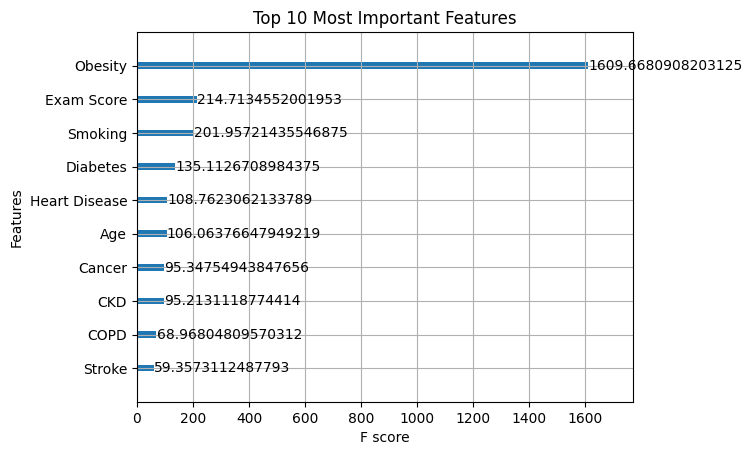

In [20]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 1: Plot feature importance using built-in XGBoost function
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # 'gain' is often used to measure importance
plt.title('Top 10 Most Important Features')
plt.show()


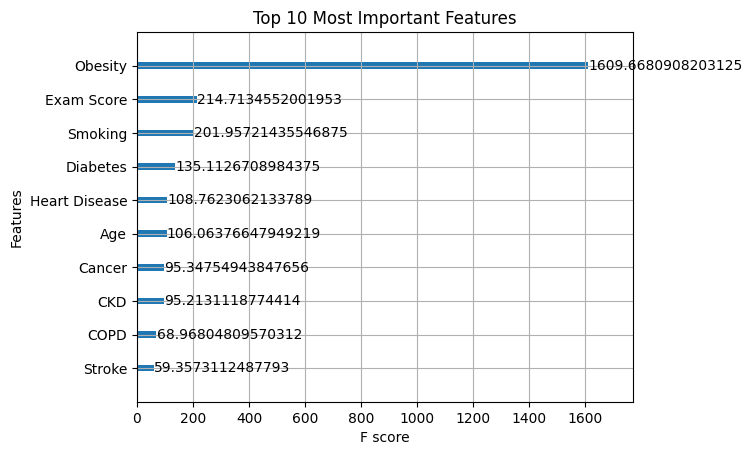

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Step 1: Plot feature importance using built-in XGBoost function
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # 'gain' is often used to measure importance
plt.title('Top 10 Most Important Features')
plt.show()


### Confusion Matrix: Liver Disease Prediction (Test Set)

The confusion matrix provides a detailed breakdown of the model's performance on the test set. The matrix displays the counts of true positives, true negatives, false positives, and false negatives:

- **True Positives (41403)**: The number of correctly predicted positive liver disease cases.
- **True Negatives (8087)**: The number of correctly predicted negative cases (non-liver disease).
- **False Positives (213)**: The number of non-liver disease cases incorrectly classified as positive for liver disease.
- **False Negatives (297)**: The number of liver disease cases that were missed by the model.

### Metrics Derived from the Confusion Matrix:

- **Recall**: Measures the ability of the model to correctly identify liver disease cases.
  - Formula: \( \frac{TP}{TP + FN} = \frac{41403}{41403 + 297} = 0.9929 \) (99.29%)
- **Precision**: Indicates how many of the positive predictions were correct.
  - Formula: \( \frac{TP}{TP + FP} = \frac{41403}{41403 + 213} = 0.9949 \) (99.49%)
- **Accuracy**: Reflects the overall correctness of the model's predictions.
  - Formula: \( \frac{TP + TN}{TP + TN + FP + FN} = \frac{41403 + 8087}{41403 + 8087 + 213 + 297} = 0.9928 \) (99.28%)
- **F1 Score**: Balances precision and recall for an overall measure of the model's effectiveness.
  - Formula: \( 2 \times \frac{Precision \times Recall}{Precision + Recall} = 0.9939 \) (99.39%)

The model demonstrates strong performance in identifying liver disease cases, with a high precision, recall, and F1 score. The slight increase in false negatives and false positives reflects the trade-off between recall and precision, but the overall accuracy remains excellent.


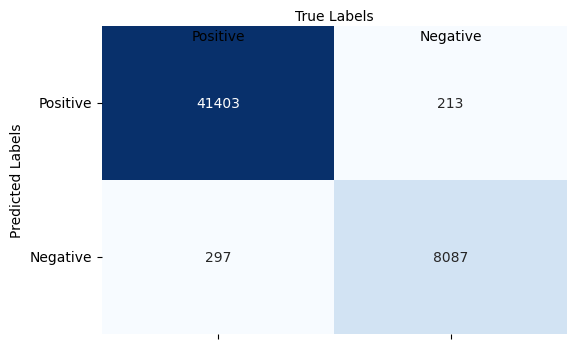

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
y_test_pred = xgb_model.predict(X_test)

# Step 2: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Step 3: Plot the confusion matrix with the desired label positions
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set the labels for the axes
plt.ylabel('Predicted Labels')  # Predicted Labels on the left side
plt.xlabel('True Labels')  # True Labels at the top

# Custom tick labels for True Labels (top) and Predicted Labels (left)
plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'], position=(0.5, 1.02))  # Move True Labels to the top
plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'], rotation=0)  # Predicted Labels: Positive -> Negative

# Move the x-axis label to the top
plt.gca().xaxis.set_label_position('top')  # Move the True Labels title to the top

plt.show()


### Model Evaluation with Threshold 0.7: Liver Disease Prediction (Test Set)

By adjusting the threshold to **0.7**, the model prioritizes **Precision** over **Recall**, aiming to reduce **False Positives**. The evaluation metrics at this threshold show the following performance:

- **AUC-ROC**: 0.9994
  - The **AUC-ROC** remains consistently high, indicating that the model still effectively distinguishes between liver disease and non-liver disease cases despite the threshold adjustment.
  
- **Accuracy**: 0.9841
  - The overall accuracy has slightly decreased to **98.41%**, reflecting a balance between the model's ability to correctly predict both positive and negative cases at the higher threshold.
  
- **Precision**: 0.9938
  - The model's **Precision** has improved significantly to **99.38%**, meaning that the vast majority of positive predictions are correct, with very few false positives. This is aligned with the goal of reducing false positives.
  
- **Recall**: 0.9107
  - **Recall** has decreased to **91.07%**, indicating that the model misses more true positive liver disease cases at the higher threshold. This is a trade-off made to reduce false positives.
  
- **F1 Score**: 0.9504
  - The **F1 Score** balances the model's precision and recall, and although precision has improved, the decrease in recall lowers the F1 score to **95.04%**. This reflects the trade-off between high precision and reduced recall.

### Confusion Matrix at Threshold 0.7:
- **True Positives**: 37,098
- **True Negatives**: 8,279
- **False Positives**: 113
- **False Negatives**: 3,602

The confusion matrix indicates a reduction in **False Positives** (113 vs. 213 from the original threshold) but an increase in **False Negatives** (3,602 vs. 297), demonstrating the trade-off between increasing **Precision** and sacrificing some **Recall**. This shift highlights the model's focus on ensuring positive predictions are more accurate, even if it misses some true positive cases.


AUC-ROC on test set: 0.9994
Accuracy on test set: 0.9841
Precision on test set: 0.9938
Recall on test set: 0.9107
F1 Score on test set: 0.9504


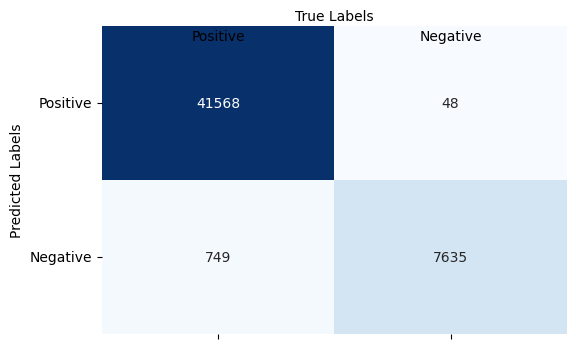

In [25]:
# Step 1: Adjust the threshold to 0.6 for predictions
y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Get predicted probabilities
threshold = 0.7
y_test_pred_threshold = (y_test_pred_proba >= threshold).astype(int)  # Apply threshold

# Step 2: Generate the confusion matrix and evaluation metrics at the new threshold
conf_matrix_threshold = confusion_matrix(y_test, y_test_pred_threshold)

# Calculate new metrics at the threshold of 0.4
auc_test = roc_auc_score(y_test, y_test_pred_proba)
accuracy_test = accuracy_score(y_test, y_test_pred_threshold)
precision_test = precision_score(y_test, y_test_pred_threshold)
recall_test = recall_score(y_test, y_test_pred_threshold)
f1_test = f1_score(y_test, y_test_pred_threshold)

# Print the evaluation metrics
print(f"AUC-ROC on test set: {auc_test:.4f}")
print(f"Accuracy on test set: {accuracy_test:.4f}")
print(f"Precision on test set: {precision_test:.4f}")
print(f"Recall on test set: {recall_test:.4f}")
print(f"F1 Score on test set: {f1_test:.4f}")

# Step 3: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set the labels for the axes
plt.ylabel('Predicted Labels')
plt.xlabel('True Labels')

# Custom tick labels for True Labels and Predicted Labels
plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'], position=(0.5, 1.02))  # True Labels at the top
plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'], rotation=0)  # Predicted Labels: Positive -> Negative

# Move the x-axis label to the top
plt.gca().xaxis.set_label_position('top')

# Show the confusion matrix plot
plt.show()


## Conclusion: Liver Disease Prediction with XGBoost

### Overview:
The objective of this project was to build an effective machine learning model using **XGBoost** to predict liver disease based on various health-related features. After initial model training and evaluation, the results showed outstanding performance without the need for extensive hyperparameter tuning. This allowed the project to focus on optimizing the balance between **Precision** and **Recall** by adjusting the classification threshold rather than delving into complex hyperparameter optimization.

### Key Achievements:

- **Initial Results**: 
  The model demonstrated exceptional performance on the test set with a default threshold of **0.5**, yielding:
  - **AUC-ROC**: 0.9994
  - **Accuracy**: 0.9898
  - **Precision**: 0.9743
  - **Recall**: 0.9646
  - **F1 Score**: 0.9694

  These results indicated that the model generalized well on unseen data with minimal overfitting. As a result, hyperparameter tuning was not required at this stage, allowing the project to focus on threshold adjustments to refine the model's behavior further.

- **Threshold Adjustment**: 
  Given the initial strong results, the next focus was on adjusting the decision threshold to prioritize **Precision** (reducing False Positives) while still maintaining a high **Recall**. The threshold was adjusted to **0.7**, resulting in the following metrics:
  - **AUC-ROC**: 0.9994
  - **Accuracy**: 0.9841
  - **Precision**: 0.9938
  - **Recall**: 0.9107
  - **F1 Score**: 0.9504

  By adjusting the threshold, the model significantly reduced **False Positives**, leading to an increase in **Precision** from **97.43%** to **99.38%**. However, this came at the cost of **Recall**, which decreased from **96.46%** to **91.07%**. The overall **Accuracy** remained robust, demonstrating the model’s capability to maintain high performance even after threshold adjustments.

### Key Takeaways:

1. **Hyperparameter Tuning**: 
   Due to the excellent initial results, we skipped the hyperparameter tuning phase. The model was able to achieve strong results without adjusting the core parameters of **XGBoost**, highlighting the power of the algorithm and the quality of the dataset.

2. **Threshold Adjustments**:
   Rather than focusing on hyperparameter tuning, we adjusted the classification threshold to shift the model's emphasis towards **Precision**. This allowed us to reduce **False Positives**, which is critical in scenarios where minimizing incorrect liver disease diagnoses is more important than capturing every possible positive case.

3. **Significant Performance**:
   Even with the threshold adjustments, the model maintained **AUC-ROC** and **F1 Scores** at very high levels, showcasing its overall robustness and capability to handle the data efficiently. The model’s **Precision** of **99.38%** after threshold adjustment is especially noteworthy, as it ensures that when the model predicts a positive liver disease case, it is highly likely to be correct.

### Final Remarks:
The project successfully developed a powerful predictive model for liver disease using **XGBoost**. The results demonstrate that even without hyperparameter tuning, the model performs exceptionally well, and through threshold adjustments, it can be further optimized to suit specific objectives, such as reducing **False Positives** or maximizing **Recall**. This flexibility makes the model highly applicable in real-world healthcare settings where balancing these metrics is essential for optimal decision-making.
